In [99]:
from dataset.SwissImageDataset import SwissImage, unnormalize_batch
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.colors import ListedColormap
%load_ext autoreload
%autoreload 2
from torch.utils.data import DataLoader
from utils.transforms import Compose, MyRandomRotation90, MyRandomHorizontalFlip, MyRandomVerticalFlip
from torchvision import transforms


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
dataset_csv =   '/home/valerie/Projects/Alps_LCC/data/split_subset/train_subset_few.csv'
   
img_dir = '/home/valerie/data/rocky_tlm/rgb/'  #'/data/xiaolong/rgb'
dem_dir = '/home/valerie/data/rocky_tlm/dem/' # /data/xiaolong/dem'
mask_dir = '/home/valerie/data/ace_alps/mask'

In [72]:
dataset = SwissImage(dataset_csv=dataset_csv,img_dir=img_dir,dem_dir=dem_dir,mask_dir=mask_dir)
num_samples = 15
dataloader = torch.utils.data.DataLoader(dataset, batch_size=num_samples, shuffle=True)

In [73]:
batch = next(iter(dataloader))
rgb_images, dems, segmentation_maps = batch
rgb_images = unnormalize_batch(rgb_images)

# Convert the tensors to numpy arrays
rgb_images = rgb_images.numpy()
dems = dems.numpy()
segmentation_maps = segmentation_maps.numpy()

In [ ]:
# Loop over the samples and plot them
colors = ['black', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink','blue','red']
cmap=ListedColormap(colors)

for i in range(num_samples):
    
    rgb_images, dems, segmentation_maps = dataset[0]
    
    plt.figure()
    plt.subplot(131)
    plt.imshow(rgb_images[i].transpose(1, 2, 0))
    plt.title("RGB Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(dems[i][0], cmap='viridis')
    plt.title("DEM")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(segmentation_maps[i][0], cmap=cmap)
    plt.title("Segmentation Map")
    plt.axis('off')

In [101]:
batch = next(iter(dataloader))
rgb_images, dems, segmentation_maps = batch
rgb_images = unnormalize_batch(rgb_images)

# Convert the tensors to numpy arrays
rgb_images = rgb_images.numpy()
dems = dems.numpy()
segmentation_maps = segmentation_maps.numpy()

common_transform = Compose([
        MyRandomHorizontalFlip(p=0.5),
        MyRandomVerticalFlip(p=0.5),
        MyRandomRotation90(p=0.5),
        ])
        
img_transform = transforms.Compose([  transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05)  ]) 
ds = SwissImage(            dataset_csv,  img_dir,  dem_dir,  mask_dir,  common_transform = common_transform, img_transform = img_transform, )

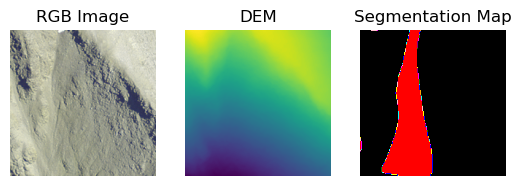

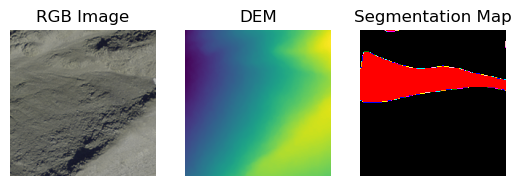

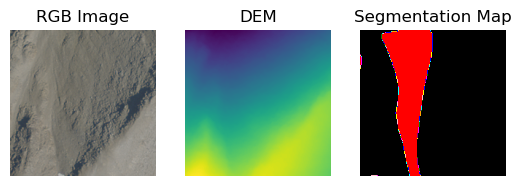

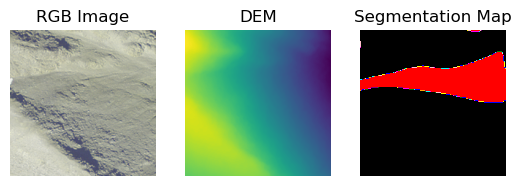

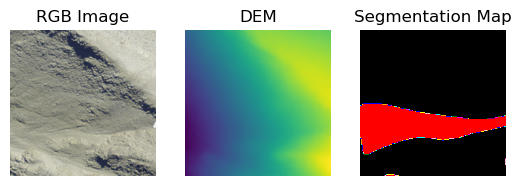

In [117]:
# Loop over the samples and plot them
colors = ['black', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink','blue','red']
cmap=ListedColormap(colors)

for i in range(5):
    ds = SwissImage( dataset_csv,  img_dir,  dem_dir,  mask_dir,  common_transform = common_transform, img_transform = img_transform, )
    
    rgb_images, dems, segmentation_maps = ds[402]
    rgb_images = unnormalize_batch(rgb_images).squeeze(0).squeeze(0)
    rgb_images = rgb_images.squeeze(0).numpy()
    dems = dems.numpy()
    segmentation_maps = segmentation_maps.squeeze(0).numpy()
   # print(rgb_images.shape,dems.shape,segmentation_maps.shape)
    
    plt.figure()
    plt.subplot(131)
    plt.imshow(rgb_images.transpose(1, 2, 0))
    plt.title("RGB Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(dems[0], cmap='viridis')
    plt.title("DEM")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(segmentation_maps, cmap=cmap)
    plt.title("Segmentation Map")
    plt.axis('off')